In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
from skimage.transform import resize

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)  # Розширення розмірності для каналу
test_images = np.expand_dims(test_images, axis=-1)
train_images = train_images.astype('float32') / 255.0  # Нормалізація значень пікселів до діапазону [0, 1]
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)  # Кодування міток класів у вектори з одним активним значенням
test_labels = to_categorical(test_labels)

# Розширення розміру зображень до 3 каналів
train_images_rgb = np.repeat(train_images, 3, axis=-1)
test_images_rgb = np.repeat(test_images, 3, axis=-1)

# Зміна розміру зображень до очікуваного розміру для моделі VGG16
train_images_resized = np.array([resize(img, (32, 32)) for img in train_images_rgb])
test_images_resized = np.array([resize(img, (32, 32)) for img in test_images_rgb])

# Розділення навчального набору на навчальний та валідаційний
train_images_resized, val_images_resized, train_labels, val_labels = train_test_split(train_images_resized, train_labels, test_size=0.2, random_state=42)

In [3]:
base_model = VGG16(include_top=False, weights="imagenet" , input_shape=(32, 32, 3))

# Заморожуємо ваги базової моделі
base_model.trainable = False

# Створення згорткової нейронної мережі
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/25
750/750 [==============================] - 21s 22ms/step - loss: 0.6834 - accuracy: 0.7584 - val_loss: 0.4577 - val_accuracy: 0.8317
Epoch 2/25
750/750 [==============================] - 13s 18ms/step - loss: 0.4747 - accuracy: 0.8295 - val_loss: 0.4108 - val_accuracy: 0.8489
Epoch 3/25
750/750 [==============================] - 10s 13ms/step - loss: 0.4267 - accuracy: 0.8463 - val_loss: 0.4058 - val_accuracy: 0.8520
Epoch 4/25
750/750 [==============================] - 10s 14ms/step - loss: 0.3965 - accuracy: 0.8555 - val_loss: 0.3854 - val_accuracy: 0.8603
Epoch 5/25
750/750 [==============================] - 10s 14ms/step - loss: 0.3780 - accuracy: 0.8622 - val_loss: 0.3632 - val_accuracy: 0.8683
Epoch 6/25
750/750 [==============================] - 10s 13ms/step - loss: 0.3608 - accuracy: 0.8687 - val_loss: 0.3666 - val_accuracy: 0.8650
Epoch 7/25
750/750 [==============================] - 10s 14ms/step - loss: 0.3455 - accuracy: 0.8741 - val_loss: 0.3716 - val_accuracy:

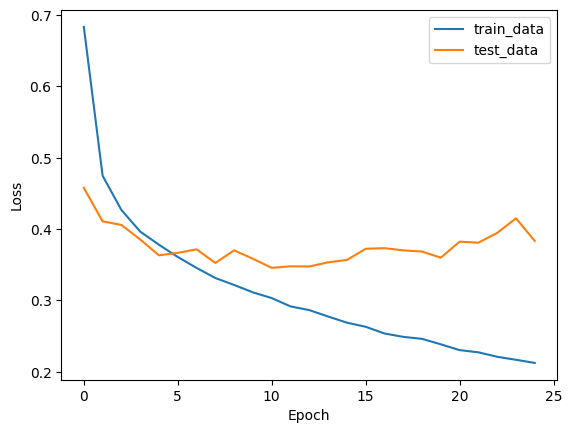

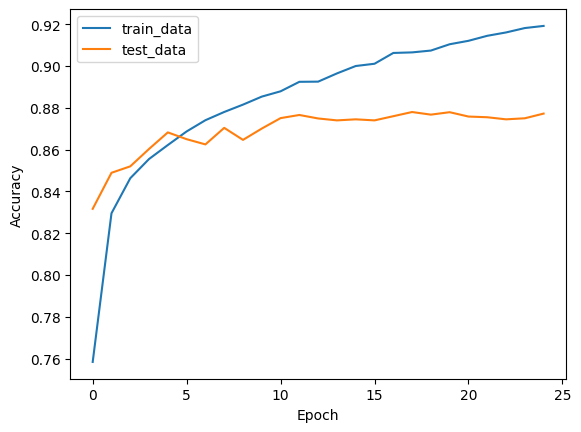

In [4]:
history = model.fit(train_images_resized, train_labels, epochs=25, batch_size=64, validation_data=(val_images_resized, val_labels))
plt.plot(history.history['loss'], label='train_data')
plt.plot(history.history['val_loss'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_data')
plt.plot(history.history['val_accuracy'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
test_loss, test_accuracy = model.evaluate(test_images_resized, test_labels)
print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 3s 10ms/step - loss: 0.4091 - accuracy: 0.8758
Точність на тестовому наборі: 87.58%
